## **Business Problem**


  Health insurance companies face challenges in accurately pricing insurance premiums for individuals and families. Pricing too high can deter potential customers, while pricing too low can lead to financial losses. Traditional methods rely on actuarial tables and generalized risk assessments, which may not account for all relevant factors.
* A data-driven approach using machine learning can help insurers:   
  * Accurately predict insurance costs based on individual risk factors.
  * Optimize pricing strategies to remain competitive.
  *  Reduce financial risks by better assessing customer profiles.



### **Objectives**

* Use machine learning to:

  1. Predict health insurance charges based on personal and health-related data.

  2. Identify the most important factors that affect pricing.

  3. Compare different regression models and choose the best one.

  4. Help insurance companies price fairly and competitively.

### **Business Benefits**

* Improved Pricing Accuracy
* Better risk assessment leads to fairer premiums.
*  Data-driven pricing attracts more customers.
* Reduced Financial Risk
*  Minimizes underpricing high-risk individuals.
* Enhanced Customer Satisfaction –
* Transparent and personalized pricing improves trust.



### **Dataset Details**


* Target variable: charges (total insurance cost)

* Input features:

  * age – Age of the insured person

  * sex – Male or Female
  * bmi – Body Mass Index
  * children – Number of dependents

  * smoker – Yes or No

  * region – Geographic location

**Importing the Dependencies**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection and Analysis**


In [ ]:
df = pd.read_excel("/content/4021579-Health_insurance_cost (1).xlsx")
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


In [ ]:
# No.of rows and columns
df.shape

(1338, 7)

In [ ]:
# Getting some Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [ ]:
# check for Duplicated Rows
df.duplicated().sum()

np.int64(1)

In [ ]:
# checking Missing values
df.isnull().sum()

,0
age,28
gender,0
BMI,23
Children,0
smoking_status,0
location,0
health_insurance_price,2


In [ ]:
# checking Unique Values in Each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} Unique Values")



age: 47 Unique Values
gender: 2 Unique Values
BMI: 545 Unique Values
Children: 6 Unique Values
smoking_status: 2 Unique Values
location: 4 Unique Values
health_insurance_price: 1335 Unique Values


In [ ]:
# statistical Measures for Categorical colums
df.describe(include = "object")

,gender,smoking_status,location
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
# Statiscal Measures for Numerical columns
df.describe(include = "number")

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


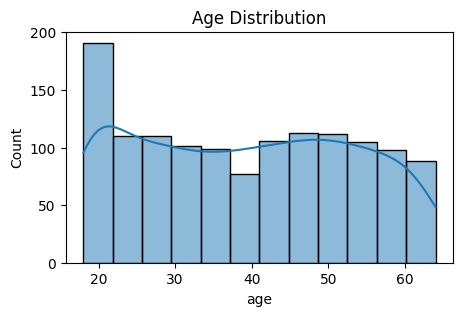

In [ ]:
# Check Ditribution of Age Column
plt.figure(figsize =(5,3))
sns.histplot(data = df,x = "age",kde =True)
plt.title("Age Distribution")
plt.show()



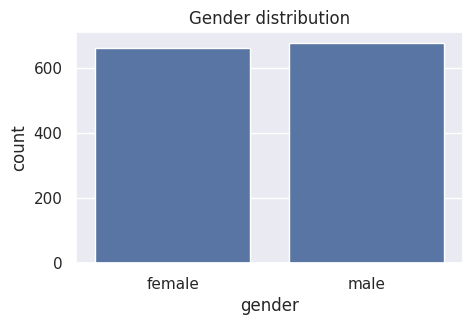

In [ ]:
sns.set()
plt.figure(figsize =(5,3))
sns.countplot(data =df,x ="gender")
plt.title("Gender distribution")
plt.show()

In [ ]:
df["gender"].value_counts()

,count
gender,
male,676
female,662


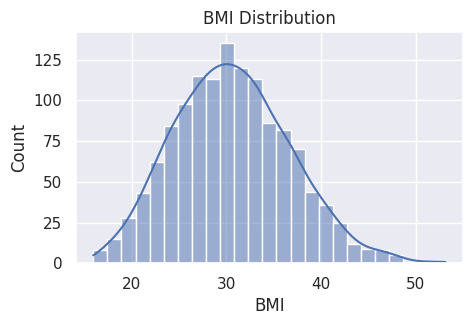

In [ ]:
# BMI Distribution
plt.figure(figsize = (5,3))
sns.histplot(data =df,x ="BMI", kde= True)
plt.title("BMI Distribution")
plt.show()

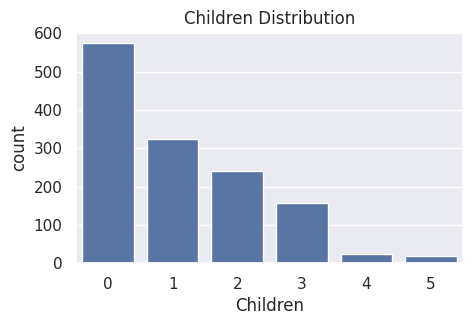

In [ ]:
# Children Distribution
plt.figure(figsize=(5,3))
sns.countplot(data = df ,x  ="Children")
plt.title("Children Distribution")
plt.show()

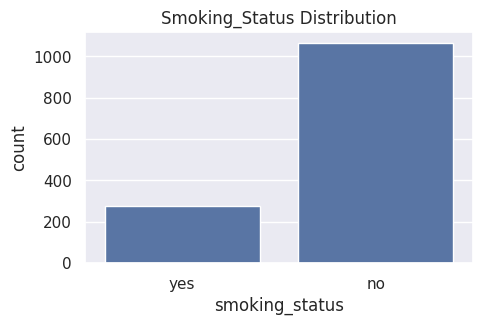

In [ ]:
#Smoking_Status Distribution
plt.figure(figsize =(5,3))
sns.countplot(data  =df,x ="smoking_status")
plt.title("Smoking_Status Distribution")
plt.show()

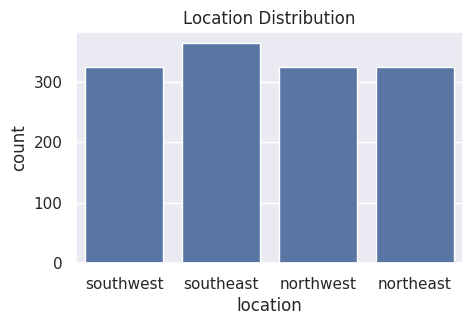

In [ ]:
#Location Distribution
plt.figure(figsize = (5,3))
sns.countplot(data =df,x= "location")
plt.title("Location Distribution")
plt.show()

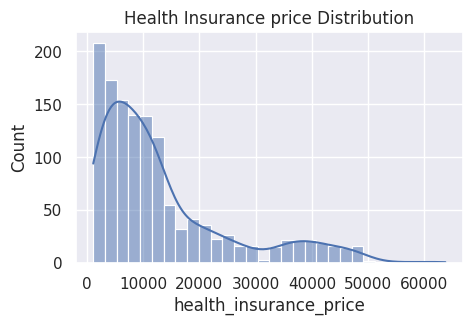

In [ ]:
#Health Insurance Price Distribution
plt.figure(figsize= (5,3))
sns.histplot(data =df,x ="health_insurance_price",kde  ="True")
plt.title("Health Insurance price Distribution")
plt.show()

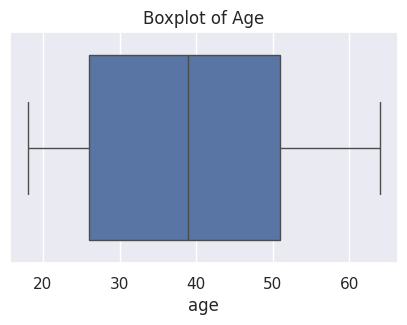

In [ ]:
# checking outliers Age column
plt.figure(figsize =(5,3))
sns.boxplot(data =df,x ="age")
plt.title("Boxplot of Age")
plt.show()

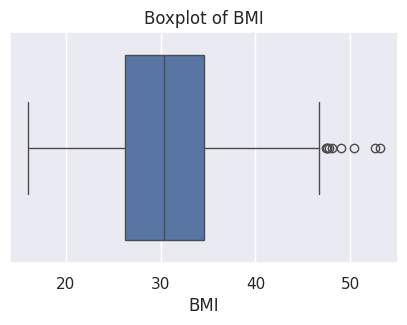

In [ ]:
# checking outliers BMI column
plt.figure(figsize=(5,3))
sns.boxplot(data =df,x ="BMI")
plt.title("Boxplot of BMI")
plt.show()

<Axes: >

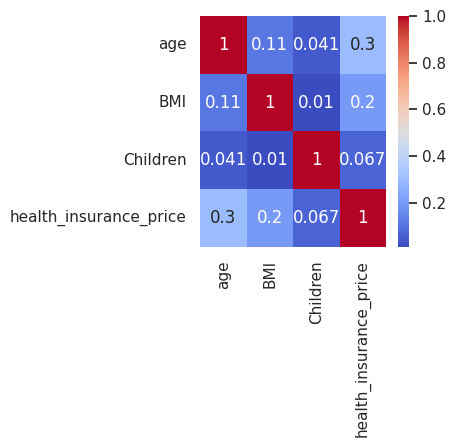

In [ ]:
# checking correlation for numerical columns
plt.figure(figsize=(3,3))
numerical_col = df.select_dtypes(include="number").corr()
sns.heatmap(numerical_col,annot =True,cmap ="coolwarm")

## **Data Preprocessing**

### **Handling Duplicates**

In [ ]:
# Remove Duplicates
df  =df.drop_duplicates()
print("verify Duplicates",df.shape)



verify Duplicates (1337, 7)


In [ ]:
# ckecking duplicates
print("No.of Duplicates",df.duplicated().sum())



No.of Duplicates 0


In [ ]:
# Rename the columns
df = df.rename(columns = {"age":"Age"})
df = df.rename(columns  ={"gender":"Gender"})
df = df.rename(columns = {"smoking_status":"Smoking_Status"})
df =df.rename(columns = {"location":"Location"})
df =df.rename(columns= {"health_insurance_price" : "Health_Insurance_Price"})

In [ ]:
# Round Column Values
df["Age"] = df["Age"].astype("Int64").round()
df["Children"] = df["Children"].round()
df["Health_Insurance_Price"] = df["Health_Insurance_Price"].round(2)
df["BMI"] =df["BMI"].round(2)


### **Handling Missing Values**




In [ ]:
# Creating separate copies for different imputation techniques
df_mean  =df.copy()
df_median = df.copy()
df_mode =df.copy()
df_interpolation = df.copy()
df_bfill = df.copy()
df_ffill = df.copy()

In [ ]:
# Replace  age column null values with median
df["Age"] =df["Age"].fillna(df["Age"].median())
# Replace  BMI column null values with median
df["BMI"] = df["BMI"].fillna(df["BMI"].median())
# Replace  health_insurance_price column null values with median
df["Health_Insurance_Price"] = df["Health_Insurance_Price"].fillna(df["Health_Insurance_Price"].median())   ## because of column have outliers



### **Handling Outliers**

In [ ]:
from scipy.stats import zscore
df_clean = df.copy()
upper_limit = df_clean["BMI"].mean() + 3 * df_clean["BMI"].std()
lower_limit = df_clean["BMI"].mean() - 3 * df_clean["BMI"].std()
print(upper_limit)
print(lower_limit)


48.8117082372058
12.453497447162192


In [ ]:
outliers = df_clean[(df_clean["BMI"] > upper_limit) | (df_clean["BMI"] < lower_limit)]
print("Number of outliers:", len(outliers))

Number of outliers: 4


In [ ]:
df_clean = df_clean[(df_clean["BMI"] <= upper_limit) & (df_clean["BMI"] >= lower_limit)]
print("old data:",len(df))
print("New data:",len(df_clean))

old data: 1337
New data: 1333


Text(0.5, 1.0, 'After Remove Outliers using boxplot ')

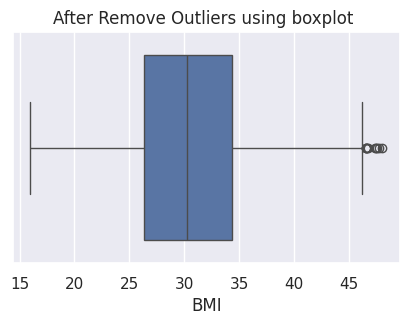

In [ ]:
plt.figure(figsize =(5,3))
sns.boxplot(data =df_clean,x ="BMI")
plt.title("After Remove Outliers using boxplot ")

## ***Encoding ***

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df_clean.copy()
df_encoded["Gender"] = df_encoded["Gender"].map({"male": 0, "female": 1})
df_encoded["Smoking_Status"] = df_encoded["Smoking_Status"].map({"yes": 0, "no": 1})
df_encoded["Location"] =df_encoded["Location"].map({"southeast":0,"southwest":1,"northeast":2,"northwest":3})

### **Splitting Features and Target**

In [ ]:
X = df_encoded.drop("Health_Insurance_Price",axis =1)
Y = df_encoded["Health_Insurance_Price"]

In [ ]:
X

,Age,Gender,BMI,Children,Smoking_Status,Location
0,19,1,30.30,0,0,1
1,18,0,33.77,1,1,0
2,28,0,33.00,3,1,0
3,33,0,22.70,0,1,3
4,32,0,28.88,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.97,3,1,3
1334,18,1,31.92,0,1,2
1335,18,1,36.85,0,1,0
1336,21,1,25.80,0,1,1


In [ ]:
Y

,Health_Insurance_Price
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.94


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2,random_state =2)
print(X.shape,X_train.shape,X_test.shape)

(1333, 6) (1066, 6) (267, 6)


## **Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "KNeighbors Regressor": KNeighborsRegressor()
}

In [ ]:
# Step 5: Train, predict, and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(Y_test, predictions)
    efficiency = r2 * 100
    results[name] = efficiency
    print(f"{name}: {efficiency:.2f}% efficient")

Linear Regression: 77.77% efficient
Decision Tree: 67.00% efficient
Random Forest: 83.49% efficient
Support Vector Regressor: -11.32% efficient
KNeighbors Regressor: 5.67% efficient


In [ ]:

# Step 6: Find the best model
best_model = max(results, key=results.get)
print("\nBest Model:", best_model)
print(f"Efficiency: {results[best_model]:.2f}%")



Best Model: Random Forest
Efficiency: 83.49%


In [ ]:
# Take best model by on efficent
final_model = models[best_model]
final_model.fit(X, Y)

#  Make prediction from user input
print("\nEnter values for prediction:")
input_data = []

for col in X.columns:
    val = float(input(f"Enter value for {col}: "))
    input_data.append(val)

# Convert input to DataFrame for prediction
input_df = pd.DataFrame([input_data], columns=X.columns)

# Predict
predicted_value = final_model.predict(input_df)
print(f"\n Predicted Output: {predicted_value[0]:.2f}")



Enter values for prediction:
Enter value for Age: 28
Enter value for Gender: 0
Enter value for BMI: 33
Enter value for Children: 3
Enter value for Smoking_Status: 1
Enter value for Location: 0

✅ Predicted Output: 4500.74
